In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2lab, lab2rgb
from tqdm import tqdm

from utils import build_fragment_from_directory, Fragment
from shape_align import *
from shape_utils import get_colorized_edge
from shape_utils import linearize_edge
from curvature import edge_coords2curvatures
from shape_align import water
from typing import List, Dict, Tuple
from joblib import Parallel, delayed

In [2]:
data_dir = '../../dataset'
palette = np.array([[4.83058360e+01, -4.28336049e+00, -1.04226657e+00],
                    [7.28763389e+01,  1.10190913e+01,  2.91083397e+01],
                    [1.93975643e+01,  8.21757008e+00, -6.52862709e+00],
                    [6.12470461e+01,  6.38868771e+00,  1.05191202e+01],
                    [8.70237508e+01,  2.60029629e+00,  6.34060233e+00],
                    [3.84328672e+01,  2.22768163e+01,  1.17465682e+00],
                    [3.29131583e+01,  3.06846260e-02, -6.19825618e+00]])

In [3]:
frag1 = build_fragment_from_directory(data_dir + '/9')
frag2 = build_fragment_from_directory(data_dir + '/11')

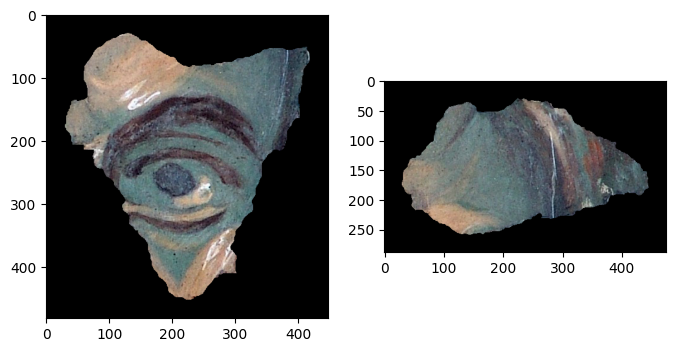

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
axes[0].imshow(frag1.fragment)
axes[1].imshow(frag2.fragment)

In [5]:
# frag_nums = [3, 5, 9, 11, 14, 15]
frag_nums = [3, 5, 6, 7, 9, 11]
frags = [build_fragment_from_directory(data_dir + '/' + str(n)) for n in frag_nums]

In [6]:
descriptors, alignment = new_pairwise_alignment(palette,frags, blocks_num=4)

Computing shape descriptors...
Computing pairwise alignments...
Aligning fragments 0 and 1:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:03<00:00, 571.85it/s]


12
2
Aligning fragments 0 and 2:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:03<00:00, 467.07it/s]


1
1
Aligning fragments 0 and 3:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:07<00:00, 235.04it/s]


12
3
Aligning fragments 0 and 4:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:11<00:00, 156.62it/s]


16
4
Aligning fragments 0 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:08<00:00, 223.21it/s]


16
5
Aligning fragments 1 and 2:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:01<00:00, 438.45it/s]


6
2
Aligning fragments 1 and 3:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:03<00:00, 211.55it/s]


16
3
Aligning fragments 1 and 4:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:04<00:00, 174.56it/s]


10
4
Aligning fragments 1 and 5:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:03<00:00, 209.48it/s]


8
2
Aligning fragments 2 and 3:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:03<00:00, 240.61it/s]


10
2
Aligning fragments 2 and 4:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:04<00:00, 172.93it/s]


16
3
Aligning fragments 2 and 5:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:03<00:00, 221.14it/s]


14
4
Aligning fragments 3 and 4:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1846/1846 [00:11<00:00, 166.40it/s]


8
2
Aligning fragments 3 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1846/1846 [00:08<00:00, 215.23it/s]


12
2
Aligning fragments 4 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 2516/2516 [00:13<00:00, 190.80it/s]


16
5


In [130]:
# def compute_diag_score(curvs1, curvs2, seq1, seq2):
#     m, n = len(seq1), len(seq2)  # length of two sequences
#     curv_diff = np.abs(curvs1[:, None] + curvs2[None, :])[:,:,0]
#     color_diff = norm(seq1[:, None, :] - seq2[None, :, :], axis=2)
#     color_sim = color_diff < 1000
#     diag_score = np.zeros((m , n))
    
#     diag_score[np.logical_not(color_sim)] = - 30
    
#     diag_score[np.logical_and(curv_diff < 0.02, color_sim)] = 45
#     diag_score[np.logical_and(0.02 < curv_diff, curv_diff < 0.03, color_sim)] = 30
#     diag_score[np.logical_and(0.03 < curv_diff, curv_diff < 0.04, color_sim)] = - 20
#     diag_score[np.logical_and(0.04 < curv_diff, curv_diff < 0.05, color_sim)] = - 40
#     diag_score[np.logical_and(0.05 < curv_diff, color_sim)] = - 80
    
#     diag_score[np.logical_and(0.03 < curv_diff, curv_diff < 0.04, np.logical_not(color_sim))] = - 30
#     diag_score[np.logical_and(0.04 < curv_diff, curv_diff < 0.05, np.logical_not(color_sim))] = - 60
#     diag_score[np.logical_and(0.05 < curv_diff, np.logical_not(color_sim))] = - 120

#     diag_score[np.logical_and((curvs1 > 0.05)[:, None, 0], (curvs2 < -0.05)[None, :, 0])] = 40
#     diag_score[np.logical_and((curvs1 < -0.05)[:, None, 0], (curvs2 > 0.05)[None, :, 0])] = 40
#     diag_score[np.logical_and((curvs1 > 0.07)[:, None, 0], (curvs2 < -0.07)[None, :, 0])] = 60
#     diag_score[np.logical_and((curvs1 < -0.07)[:, None, 0], (curvs2 > 0.07)[None, :, 0])] = 60
    
    
#     return diag_score

In [457]:
# def compute_diag_score(curvs1, curvs2, seq1, seq2):
#     print("new diag score is estimated")
#     m, n = len(seq1), len(seq2)  # length of two sequences
#     curv_diff = np.abs(curvs1[:, None] + curvs2[None, :])[:,:,0]
#     curvs1_small = np.abs(curvs1) < 0.03
#     curvs2_small = np.abs(curvs2) < 0.03
#     one_of_curvs_small = np.logical_or(curvs1_small[:, None, 0], curvs2_small[None, :, 0])
#     both_curvs_big = np.logical_not(one_of_curvs_small)
    
#     color_diff = norm(seq1[:, None, :] - seq2[None, :, :], axis=2)
#     color_sim = color_diff < 30
#     diag_score = np.zeros((m , n))
    
#     base = 30
#     diag_score[np.logical_not(color_sim)] = -base
    
    
#     diag_score[(curv_diff < 0.02) & color_sim & one_of_curvs_small] = base 
#     diag_score[(curv_diff < 0.02) & color_sim & both_curvs_big] = base * 3
# #     diag_score[np.logical_and(curv_diff < 0.02, color_sim)] = base
#     diag_score[(0.02 < curv_diff) & (curv_diff < 0.03) & color_sim & both_curvs_big] = base * 0.5
#     diag_score[(0.03 < curv_diff) & (curv_diff < 0.04) & color_sim] = -base
#     diag_score[(0.03 < curv_diff) & (curv_diff < 0.04) & color_sim & one_of_curvs_small] = -base * 2
#     diag_score[(0.04 < curv_diff) & (curv_diff < 0.05) & color_sim] = -base * 2
#     diag_score[(0.04 < curv_diff) & (curv_diff < 0.05) & color_sim & one_of_curvs_small] = -base * 3
#     diag_score[(0.05 < curv_diff) & (color_sim)] = -base * 4
#     diag_score[(0.05 < curv_diff) & (color_sim & one_of_curvs_small)] = -base * 5
    
#     diag_score[(0.03 < curv_diff) & (curv_diff < 0.04) & np.logical_not(color_sim)] = - base
#     diag_score[(0.04 < curv_diff) & (curv_diff < 0.05) & np.logical_not(color_sim)] = - base * 2
#     diag_score[(0.05 < curv_diff) & np.logical_not(color_sim)] = - base * 4

#     diag_score[(0.05 > curvs1)[:, None, 0] & (curvs1 > 0.03)[:, None, 0] & (-0.05 < curvs2)[None, :, 0] & (curvs2 < -0.03)[None, :, 0]] = base
#     diag_score[(-0.05 < curvs1)[:, None, 0] & (curvs1 < -0.03)[:, None, 0] & (0.05 > curvs2)[None, :, 0] & (curvs2 > 0.03)[None, :, 0]] = base
#     diag_score[(curvs1 > 0.05)[:, None, 0] &(curvs2 < -0.05)[None, :, 0]] = base * 3
#     diag_score[(curvs1 < -0.05)[:, None, 0] & (curvs2 > 0.05)[None, :, 0]] = base * 3
#     diag_score[(curvs1 > 0.07)[:, None, 0] & (curvs2 < -0.07)[None, :, 0]] = base * 4
#     diag_score[(curvs1 < -0.07)[:, None, 0] & (curvs2 > 0.07)[None, :, 0]] = base * 4
#     diag_score[(curv_diff < 0.02) & color_sim & both_curvs_big] = base * 3
    
    
#     return diag_score

In [459]:

# def water(seq1, seq2, is_corner1, is_corner2, curvs1, curvs2):
#     m, n = len(seq1), len(seq2)  # length of two sequences
    
#     # Generate DP table and traceback path pointer matrix
#     score = np.zeros((m+1, n+1))      # the DP table
#     pointer = np.zeros((m+1, n+1))    # to store the traceback path
    
#     max_score = 0        # initial maximum score in DP table
#     gap_penalty = -160
    
#     diag_score = compute_diag_score(curvs1, curvs2, seq1, seq2)
# #     curv_diff = np.abs(curvs1[:, None] + curvs2[None, :])[:,:,0]
# #     color_diff = norm(seq1[:, None, :] - seq2[None, :, :], axis=2)
# #     color_sim = color_diff < 1000
# #     diag_score = np.zeros((m , n))
    
# #     base = 30
# #     diag_score[np.logical_not(color_sim)] = - 30 
    
# #     diag_score[np.logical_and(curv_diff < 0.02, color_sim)] = 45
# #     diag_score[np.logical_and(0.02 < curv_diff, curv_diff < 0.03, color_sim)] = 30
# #     diag_score[np.logical_and(0.03 < curv_diff, curv_diff < 0.04, color_sim)] = - 20
# #     diag_score[np.logical_and(0.04 < curv_diff, curv_diff < 0.05, color_sim)] = - 40
# #     diag_score[np.logical_and(0.05 < curv_diff, color_sim)] = - 80
    
# #     diag_score[np.logical_and(0.03 < curv_diff, curv_diff < 0.04, np.logical_not(color_sim))] = - 30
# #     diag_score[np.logical_and(0.04 < curv_diff, curv_diff < 0.05, np.logical_not(color_sim))] = - 60
# #     diag_score[np.logical_and(0.05 < curv_diff, np.logical_not(color_sim))] = - 120

# #     diag_score[np.logical_and((curvs1 > 0.05)[:, None, 0], (curvs2 < -0.05)[None, :, 0])] = 40
# #     diag_score[np.logical_and((curvs1 < -0.05)[:, None, 0], (curvs2 > 0.05)[None, :, 0])] = 40
# #     diag_score[np.logical_and((curvs1 > 0.07)[:, None, 0], (curvs2 < -0.07)[None, :, 0])] = 60
# #     diag_score[np.logical_and((curvs1 < -0.07)[:, None, 0], (curvs2 > 0.07)[None, :, 0])] = 60
    
    
#     # Calculate DP table and mark pointers
#     for i in tqdm(range(1, m + 1)):
#         for j in range(1, n + 1):
#             score_diagonal = score[i - 1, j - 1] + diag_score[i - 1, j - 1]
            
#             score_up, score_left = score[i,j-1] + gap_penalty, score[i-1,j] + gap_penalty
#             m = max(0, score_left, score_up, score_diagonal)
#             score[i,j] = m
#             if m == 0:
#                 pointer[i,j] = 0 # 0 means end of the path
#             elif m == score_diagonal:
#                 pointer[i,j] = 3 # 3 means trace diagonal
#             elif m == score_left:
#                 pointer[i,j] = 1 # 1 means trace up
#             elif m == score_up:
#                 pointer[i,j] = 2 # 2 means trace left
#             if m >= max_score:
#                 max_i, max_j, max_score = i, j, score[i, j]
    
#     align1, align2 = [], []    # initial sequences
    
#     i,j = max_i,max_j    # indices of path starting point
#     indices = []
    
#     #traceback, follow pointers
#     corner_met = False
#     while pointer[i][j] != 0:
#         indices.append((i, j))
#         if pointer[i][j] == 3:
#             align1.append(seq1[i-1])
#             align2.append(seq2[j-1])
#             i -= 1
#             j -= 1
#         elif pointer[i][j] == 2:
#             align1.append(None)
#             align2.append(seq2[j-1])
#             j -= 1
#         elif pointer[i][j] == 1:
#             align1.append(seq1[i-1])
#             align2.append(None)
#             i -= 1
#     return indices, pointer, score

In [460]:
# def align_two_fragments(palette, frag1, frag2, to_print=None, shape_descriptor1=None, shape_descriptor2=None):
#     if to_print is not None:
#         print(to_print)
#     if shape_descriptor1 is None:
#         shape_descriptor1 = fragment2shape_descriptor(palette, frag1)
#     color_edge1 , curvs1 = shape_descriptor1.color_edge, shape_descriptor1.curvatures
        
#     if shape_descriptor2 is None:
#         shape_descriptor2 = fragment2shape_descriptor(palette, frag2)
#     color_edge2 , curvs2 = shape_descriptor2.color_edge, shape_descriptor2.curvatures

#     return water(color_edge1, color_edge2[::-1], None, None, curvs1, curvs2[::-1])
# def new_pairwise_alignment(palette, fragments: List, blocks_num=5) -> Tuple[List[ShapeDescriptor], Dict[Tuple[int, int], np.ndarray]]:
#     """Compute pairwise alignment between fragments.

#     Args:
#         fragments: List of fragments.
#     """
#     print("Computing shape descriptors...")
#     shape_descriptors = fragments2shape_descriptors(palette, fragments)
#     print("Computing pairwise alignments...")
#     alignment_dict = {}
#     for i, frag1 in enumerate(fragments):
#         for j, frag2 in enumerate(fragments):
#             if j > i:
#                 indices, pointer, score = align_two_fragments(
#                     palette,
#                     frag1, frag2, 
#                     to_print=f"Aligning fragments {i} and {j}:", 
#                     shape_descriptor1=shape_descriptors[i], 
#                     shape_descriptor2=shape_descriptors[j]
#                 )
#                 aligns = generate_multiple_alignments(pointer, score, shape_descriptors[i], shape_descriptors[j], blocks_num)
#                 alignment_dict[(i, j)] = aligns
    
#     return shape_descriptors, alignment_dict

In [461]:
descriptors, alignment = new_pairwise_alignment(palette,frags, blocks_num=5)

Computing shape descriptors...
Computing pairwise alignments...
Aligning fragments 0 and 1:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:03<00:00, 561.65it/s]


15
5
Aligning fragments 0 and 2:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:03<00:00, 562.99it/s]


6
3
Aligning fragments 0 and 3:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:07<00:00, 255.53it/s]


18
7
Aligning fragments 0 and 4:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:09<00:00, 188.61it/s]


18
6
Aligning fragments 0 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1818/1818 [00:07<00:00, 245.69it/s]


19
8
Aligning fragments 1 and 2:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:01<00:00, 567.05it/s]


7
3
Aligning fragments 1 and 3:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:02<00:00, 257.50it/s]


20
6
Aligning fragments 1 and 4:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:04<00:00, 187.86it/s]


17
8
Aligning fragments 1 and 5:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [00:03<00:00, 233.70it/s]


17
4
Aligning fragments 2 and 3:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:03<00:00, 258.25it/s]


13
3
Aligning fragments 2 and 4:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:04<00:00, 189.58it/s]


24
6
Aligning fragments 2 and 5:
new diag score is estimated


100%|████████████████████████████████████████████████████████████████████████████████| 842/842 [00:03<00:00, 241.91it/s]


14
4
Aligning fragments 3 and 4:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1846/1846 [00:09<00:00, 187.59it/s]


17
7
Aligning fragments 3 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 1846/1846 [00:07<00:00, 242.11it/s]


24
8
Aligning fragments 4 and 5:
new diag score is estimated


100%|██████████████████████████████████████████████████████████████████████████████| 2516/2516 [00:10<00:00, 241.27it/s]


23
9


In [462]:
print(frag_nums)

[3, 5, 6, 7, 9, 11]


In [537]:
l, r = 1, 4
align_i = 1
print(len(alignment[(l, r)]))

8


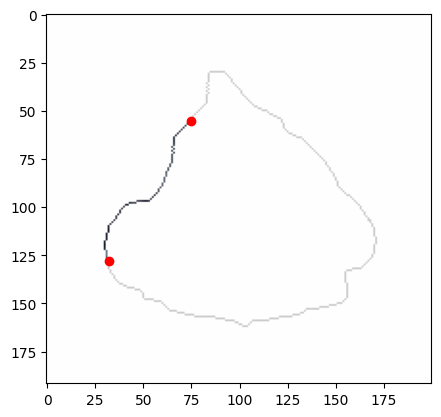

In [538]:
common_edge = np.ones(frags[l].fragment.shape)
color_edge, edge_coords, curvs = descriptors[l].color_edge, descriptors[l].edge_coords, descriptors[l].curvatures
indices = alignment[(l, r)][align_i].indices
# indices = aligns[align_i].indices
i_indices = [i for (i, j) in indices]
for i, point in enumerate(edge_coords):
    common_edge[point[0], point[1]] = 0.8
common_edge = rgb2lab(common_edge)

    
for (i, j) in indices:
    color = color_edge[i - 1]
    y, x = edge_coords[i - 1]
    common_edge[y, x] = color

plt.imshow(lab2rgb(common_edge))
common_edge = lab2rgb(common_edge)
y1, x1 = edge_coords[indices[0][0] - 1]
y2, x2 = edge_coords[indices[-1][0] - 1]
plt.scatter([x1, x2], [y1, y2], color='r')
plt.imshow(common_edge)

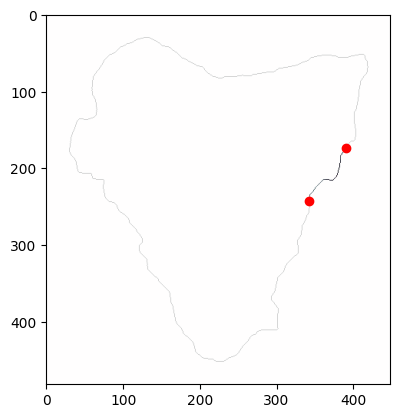

In [539]:
common_edge = np.ones(frags[r].fragment.shape)
color_edge, edge_coords, curvs = descriptors[r].color_edge[::-1], descriptors[r].edge_coords[::-1], descriptors[r].curvatures[::-1]
indices = alignment[(l, r)][align_i].indices
i_indices = [j for (i, j) in indices]
for i, point in enumerate(edge_coords):
    common_edge[point[0], point[1]] = 0.8
common_edge = rgb2lab(common_edge)
    
for (i, j) in indices:
    color = color_edge[j - 1]
    y, x = edge_coords[j - 1]
    common_edge[y, x] = color

plt.imshow(lab2rgb(common_edge))
common_edge = lab2rgb(common_edge)
y1, x1 = edge_coords[indices[0][1] - 1]
y2, x2 = edge_coords[indices[-1][1] - 1]
plt.scatter([x1, x2], [y1, y2], color='r')
plt.imshow(common_edge)

In [416]:
def visualize_curvatures(shape_descriptor, fragment):
    curvs = shape_descriptor.curvatures
    edge_coords = shape_descriptor.edge_coords
    common_edge = np.zeros(fragment.fragment.shape)
    for i, point in enumerate(edge_coords):
        common_edge[point[0], point[1], 0] = curvs[i] if 0 < curvs[i]  else 0
        common_edge[point[0], point[1], 2] = - curvs[i] if 0 > curvs[i] else 0
#     common_edge /= np.abs(curvs).max()
    common_edge *= 10
    print(common_edge.min(), common_edge.max())
#     common_edge += 0.5
    plt.imshow(common_edge)

In [413]:
print(descriptors[0].curvatures.max(), descriptors[0].curvatures.min())
print(descriptors[1].curvatures.max(), descriptors[1].curvatures.min())

0.10999044212407905 -0.09083941917380668
0.12544281821539038 -0.06309917763470788


/tmp/ipykernel_1596/2933643861.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  common_edge[point[0], point[1], 2] = - curvs[i] if 0 > curvs[i] else 0


0.0 0.9566794228082742


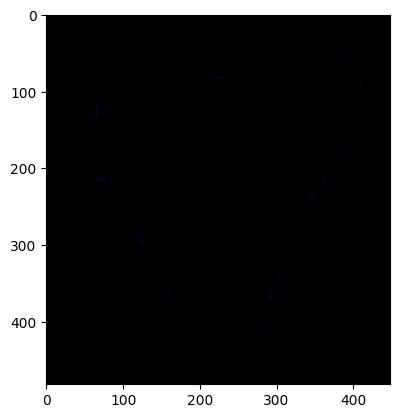

In [414]:
visualize_curvatures(descriptors[l], frags[l])

/tmp/ipykernel_1596/2933643861.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  common_edge[point[0], point[1], 2] = - curvs[i] if 0 > curvs[i] else 0


0.0 0.7842560962011962


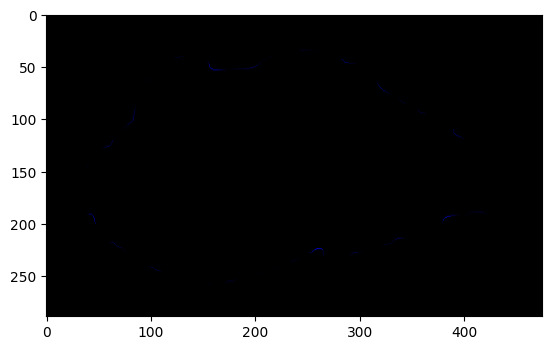

In [415]:
visualize_curvatures(descriptors[r], frags[r])

In [185]:
a = [9, 3, 2, 4]
print(a.sort())
print(a)

None
[2, 3, 4, 9]
